# 1 | Introduction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

## Read the data

In [2]:
col=['Id' , 'Entity' , 'Sentiment' , 'Content']
df_train=pd.read_csv("twitter_training.csv" , names=col)

In [3]:
df_test=pd.read_csv("twitter_validation.csv" , names=col)

In [4]:
df_train

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
15832,3108,Dota2,Negative,She wtf
15833,3108,Dota2,Negative,wtf
15834,3109,Dota2,Irrelevant,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15835,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...


# 2 | Data Overview

In [5]:
df_train.shape

(15837, 4)

In [6]:
df_train.columns

Index(['Id', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15837 entries, 0 to 15836
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         15837 non-null  int64 
 1   Entity     15837 non-null  object
 2   Sentiment  15837 non-null  object
 3   Content    15676 non-null  object
dtypes: int64(1), object(3)
memory usage: 495.0+ KB


In [8]:
df_train.dtypes

Id            int64
Entity       object
Sentiment    object
Content      object
dtype: object

# 3 | Data Cleaning

In [9]:
df_train.isnull().sum()

Id             0
Entity         0
Sentiment      0
Content      161
dtype: int64

There are 686 empty rows in content . we will drop them .

In [10]:
df_train.dropna(subset=['Content'] , inplace=True)

In [11]:
df_train.shape

(15676, 4)

In [12]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [13]:
df_train.Sentiment=df_train.Sentiment.replace('Irrelevant' , 'Neutral')
df_test.Sentiment=df_test.Sentiment.replace('Irrelevant' , 'Neutral')

In [14]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [15]:
df_test.Sentiment.unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

# Exploratary Data Analysis

### Sentiment

In [16]:
sentiment_count=df_train.Sentiment.value_counts()
sentiment_count

Neutral     6453
Negative    4648
Positive    4575
Name: Sentiment, dtype: int64

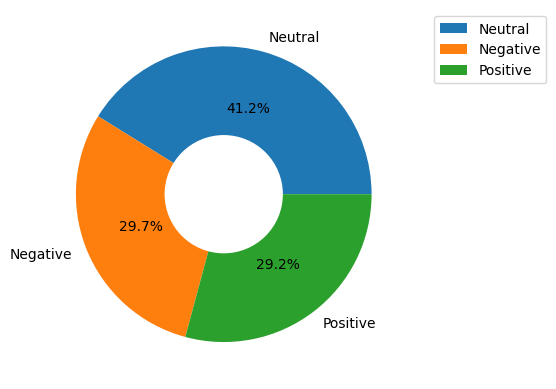

In [17]:
y=['Neutral' , 'Negative' , 'Positive']
plt.pie(sentiment_count , labels=y, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.4, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

There are 30.2% of Negative Comments , 41.9% of Neutral Comments and 27.9% of Positive Comments .

###

In [18]:
df_train.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2'], dtype=object)

In [19]:
Entity_count=df_train.Entity.value_counts()
Entity_count

CallOfDutyBlackopsColdWar    2343
NBA2K                        2343
Overwatch                    2316
Xbox(Xseries)                2283
Borderlands                  2280
Amazon                       2276
Dota2                        1835
Name: Entity, dtype: int64

In [20]:
Entity_sort=Entity_count.sort_values(ascending=False)

In [21]:
Entity_top10=Entity_sort.head(10)
Entity_top10

CallOfDutyBlackopsColdWar    2343
NBA2K                        2343
Overwatch                    2316
Xbox(Xseries)                2283
Borderlands                  2280
Amazon                       2276
Dota2                        1835
Name: Entity, dtype: int64

In [22]:
Entity_index=Entity_top10.index

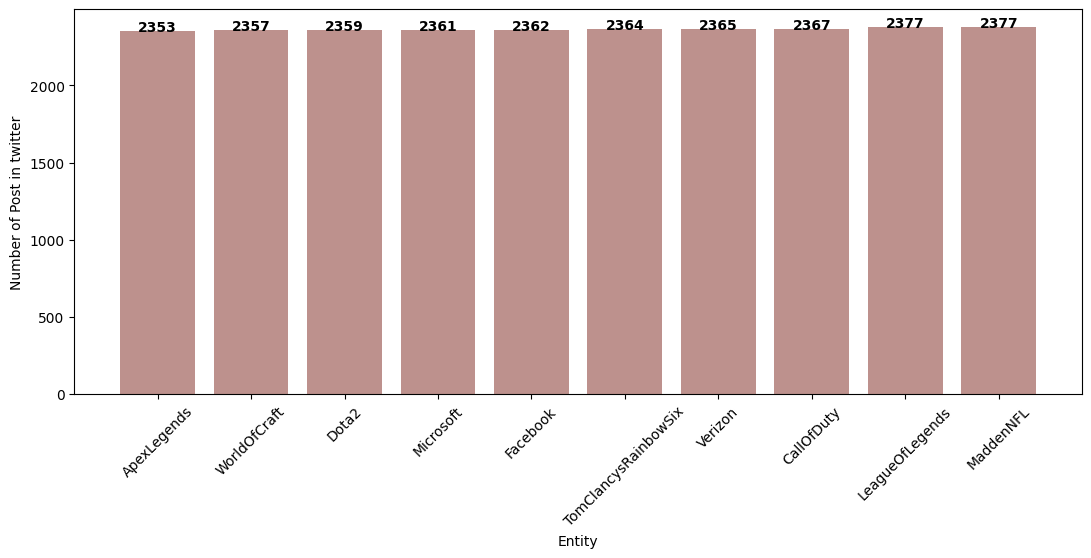

In [23]:
plt.figure(figsize=(13,5))

x=['ApexLegends' , 'WorldOfCraft' , 'Dota2' , 'Microsoft' , 'Facebook' , 'TomClancysRainbowSix' , 'Verizon' , 'CallOfDuty' , 'LeagueOfLegends' , 'MaddenNFL']
y=[2353,2357,2359,2361,2362,2364,2365,2367,2377,2377]

plt.bar( x , y , alpha=0.7 , color='#A2625D')

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold' )

plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Post in twitter')
plt.show()

In [24]:
Entity_top3_df=Entity_sort.head(3)
Entity_top3_df

CallOfDutyBlackopsColdWar    2343
NBA2K                        2343
Overwatch                    2316
Name: Entity, dtype: int64

In [25]:
Entity_top3=Entity_top3_df.index.tolist()
Entity_top3

['CallOfDutyBlackopsColdWar', 'NBA2K', 'Overwatch']

In [26]:
sentiment_by_entity=df_train.loc[df_train['Entity'].isin(Entity_top3)].groupby('Entity')['Sentiment'].value_counts().sort_index()
sentiment_by_entity

Entity                     Sentiment
CallOfDutyBlackopsColdWar  Negative      566
                           Neutral       921
                           Positive      856
NBA2K                      Negative     1469
                           Neutral       450
                           Positive      424
Overwatch                  Negative      627
                           Neutral       963
                           Positive      726
Name: Sentiment, dtype: int64

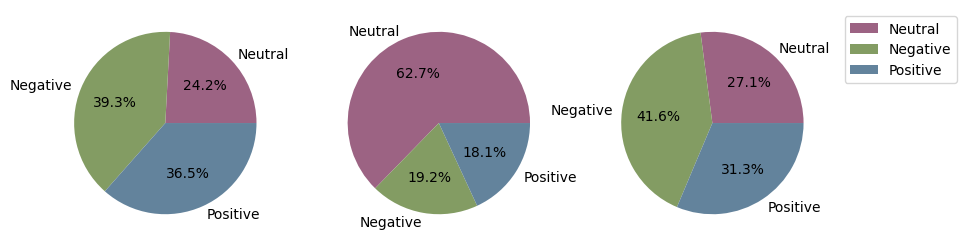

In [27]:
plt.figure(figsize=(10,5))

y=['Neutral' , 'Negative' , 'Positive']
color=['#9C6383' , '#839C63' , '#63839C']

plt.subplot(1,3,1)
plt.pie(sentiment_by_entity[:3] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,2)
plt.pie(sentiment_by_entity[3:6] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,3)
plt.pie(sentiment_by_entity[6:] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left' , fontsize="10")

There are 71.3% negative sentiment tweets about MaddenNFL, 47.5% neutral sentiment tweets about LeagueOfLegends, 44.1% neutral sentiment tweets about CallOfDuty.

# Model

In [28]:
df_train

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
15832,3108,Dota2,Negative,She wtf
15833,3108,Dota2,Negative,wtf
15834,3109,Dota2,Neutral,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15835,3109,Dota2,Neutral,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...


In [29]:
df_train.drop(['Id'] , axis=1 , inplace=True)

In [30]:
df_test.drop(['Id'] , axis=1 , inplace=True)

In [31]:
#train test split
X_train=df_train.drop(['Sentiment'] , axis=1)
X_test=df_test.drop(['Sentiment'] , axis=1)
y_train=df_train['Sentiment']
y_test=df_test['Sentiment']

In [32]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [33]:
#count the no of words in a sentence
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.Content)

In [35]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [36]:
y_train

array([2, 2, 2, ..., 1, 1, 1])

In [37]:
X_train.drop(['Entity'],axis=1,inplace=True)
X_test.drop(['Entity'],axis=1,inplace=True)

In [38]:
#model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [39]:
comment=[
    'I am coming to the borders and I will kill you.'
]
comment_count=v.transform(comment)
model.predict(comment_count)

array([2])

In [40]:
comment=[
    '"Anyone that plays a bad luck albatross deck in hearthstone is a literal cop.'
]
comment_count=v.transform(comment)
model.predict(comment_count)

array([1])

In [41]:
X_test_count=v.transform(X_test.Content)
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
X_test_count.shape

(1000, 11242)

In [43]:
#score
model.score(X_test_count,y_test)

0.642